# Comment faire un TER en 5 min

In [1]:
library(devtools)
library(slam)
library(skmeans)
library(rngtools)
library(mclust)
library(raster)
library(schoolmath)
#library(nmfgpu4R)
library(NbClust)
library(ggplot2)
library(factoextra)
library(ggplot2)
#library(NMF)

Loading required package: pkgmaker
Loading required package: registry

Attaching package: ‘pkgmaker’

The following object is masked from ‘package:base’:

    isNamespaceLoaded

Package 'mclust' version 5.4
Type 'citation("mclust")' for citing this R package in publications.
Loading required package: sp
Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ


In [2]:
Sys.setenv(CUDA_PATH="/usr/local/cuda-9.1/")
Sys.setenv(NMFGPU_ROOT="/usr/local/nmfgpu/") 

In [8]:
nmfgpu4R.init(quiet = F)

CUDA toolkit:
  - Path: /usr/local/cuda-9.1/
  - Version: 9.1
Loading nmfgpu from: /usr/local/nmfgpu/


In [4]:
getwd()
setwd("/home/mbenhamd/Project/nmf-ter/")

[1] "/home/mbenhamd/Project/nmf-ter"

In [5]:
data = read.csv("matrice-greyscale-32.csv")
dim(data)

[1] 4777 1024

In [7]:
library(nmfgpu4R) 

In [21]:
dim(t(data))

[1] 1024 4777

In [15]:
m = skmeans(t(data),67)

In [47]:
dim(m$prototypes)

[1]   67 4777

In [30]:
r = 67
c = 1024
matrice <- round(matrix(runif(r*c), r, c))

In [46]:
dim(t(matrice))

[1] 1024   67

In [65]:
results = nmf(t(data), r= 67,parameters=list(W=t(matrice),H=m$prototypes),algorithm="mu",initMethod="CopyExisting",runs=1,maxiter=10000,threshold=0.1, thresholdType="rmsd",verbose=T)

In [68]:
results = nmf(t(data), r= 67,algorithm="mu",initMethod="AllRandomValues",runs=1,maxiter=10000,threshold=0.1, thresholdType="rmsd",verbose=T)

In [69]:
show_images = function(data,from=1,to=10){
  final=vector()
for (variable in seq(from,to)) {
  b = matrix(data[,variable],nrow=32,ncol=32,byrow = T)
  final=cbind(final,b)  
}
  rst <- as.raster(final,max=max(final))
  plot(rst)
}

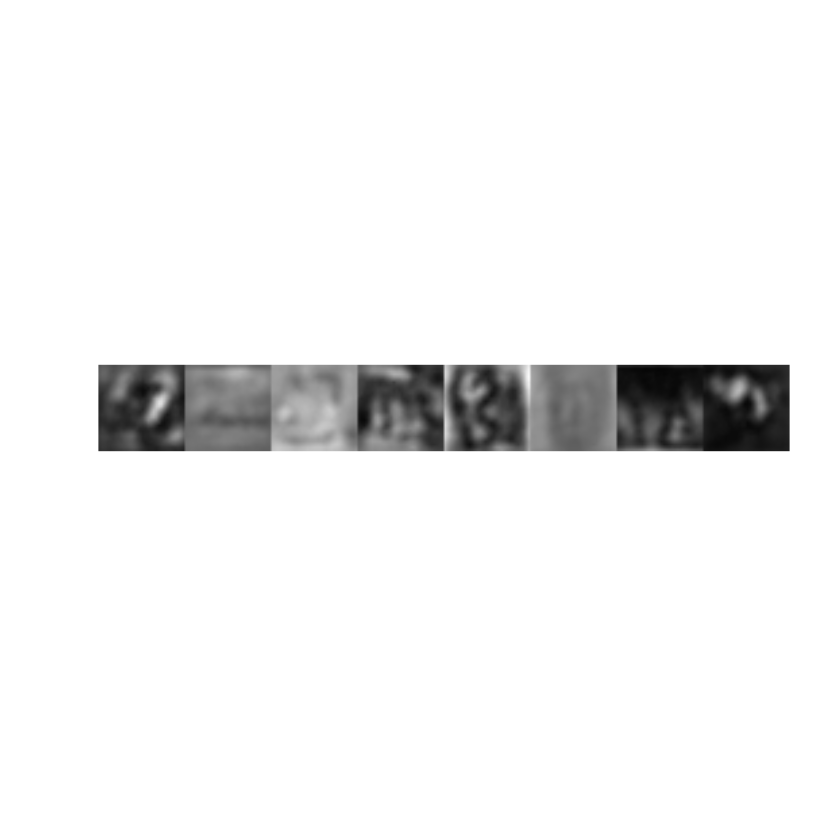

In [70]:
#show_images(as.matrix(data),1,5)
show_images(results$W%*%results$H,1,8)

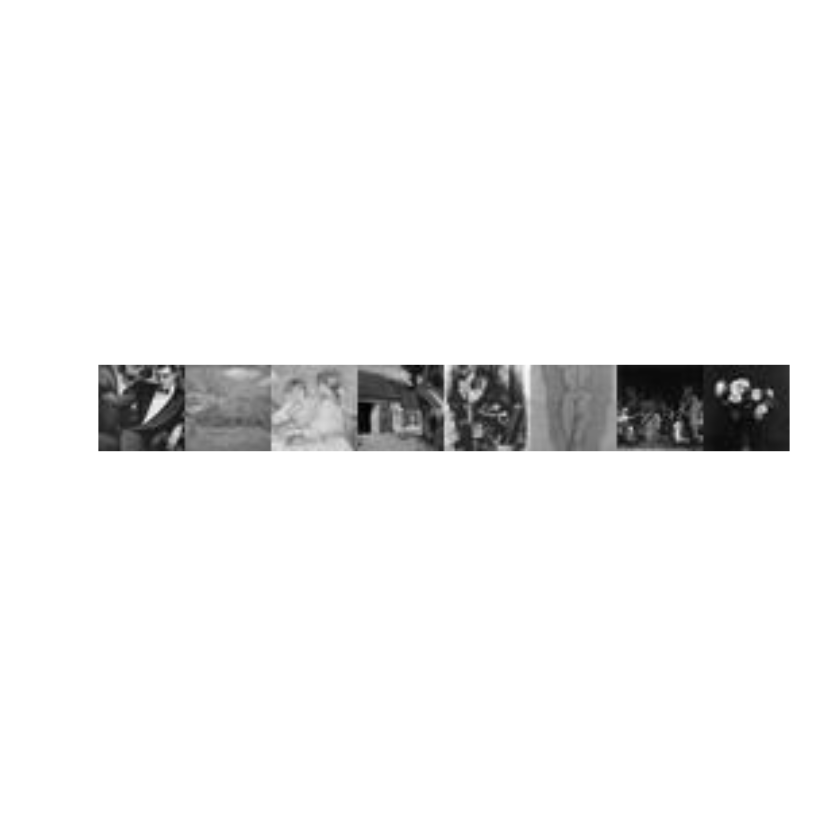

In [73]:
show_images(t(data),1,8)

In [ ]:
d = as.matrix(as.data.frame(lapply(data, as.numeric)))

In [ ]:
dyn.load("libKMCUDA.so")
res = .External("kmeans_cuda", d,10, tolerance=0.01, verbosity=0, average_distance=TRUE)  

In [ ]:
res

In [ ]:
v = vector()
for (variable in seq(from=10,to=100)){
  result = .External("kmeans_cuda", d,variable, tolerance=0.01, verbosity=0, average_distance=TRUE)  
  v=cbind(v,result$average_distance)  
}


In [ ]:
library(NMF)

In [ ]:
nmfSeed()

In [ ]:
# Use a seed that will be set before each first run
res <- nmf(t(d), 47:57, method='KL', nrun=1, seed="nndsvd",.options='v4tp8')

In [ ]:
plot(res)

In [1]:
png('nmf-16-greyscale-47-57-KL-nndsvd.png',width = 1920, height = 1080)
plot(res)
dev.off()

ERROR: Error in plot(res): object 'res' not found


In [2]:
res$measures

ERROR: Error in eval(expr, envir, enclos): object 'res' not found


In [ ]:
consensusmap(res)